In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

In [2]:
def exp_mean(alpha, sunspots):
    exp = np.zeros((len(sunspots),1))
    exp[0] = sunspots[0]
    for i in range(1, len(sunspots)):
        exp[i] = exp[i-1] + alpha*(sunspots[i] - exp[i-1])
    return(exp)

## PART I

In [3]:
data = np.loadtxt('data_group3.txt')

In [4]:
years = data[:, 0]
months = data[:, 1]
sunspots = data[:, 2]
count = len(months)

In [5]:
r_sunspots = np.zeros((count - 12, 1))  # smoothed sunspots array

for n in range(r_sunspots.shape[0]):
    r_sunspots[n, 0] = 1/24 * (data[n, 2] + data[n + 12, 2]) + 1/12 * sum(data[n + 1:n + 12, 2])

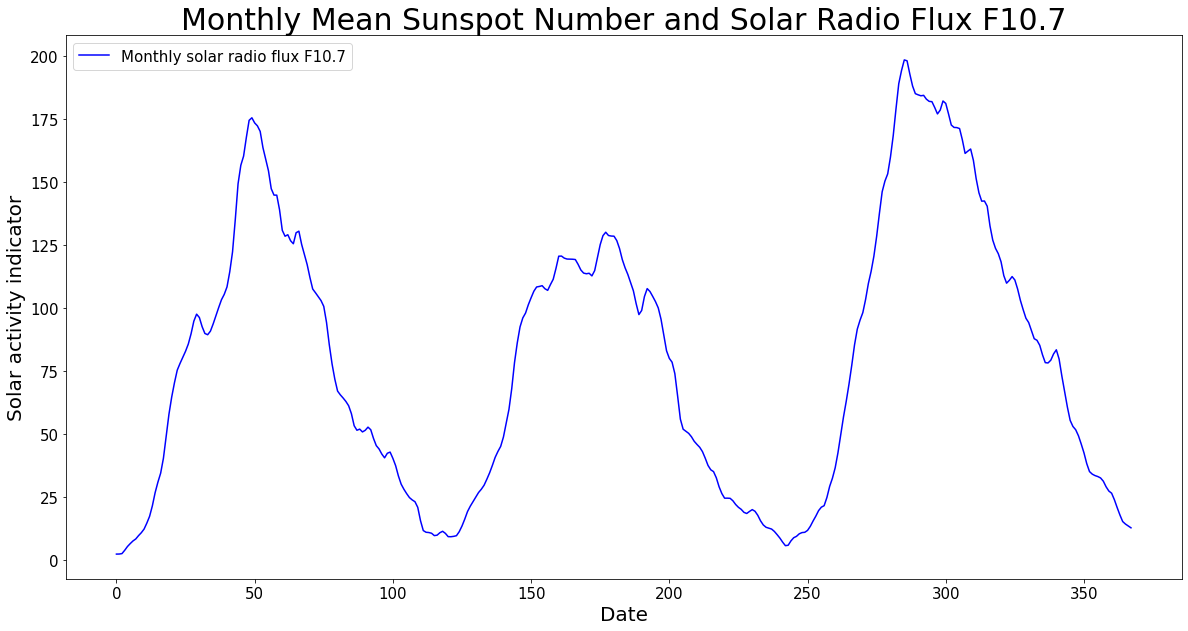

In [6]:
#Plot for monthly mean sunspot number and solar radio flux F10.7 cm
fig, ax = plt.subplots(figsize=(20,10))
ax.set_title('Monthly Mean Sunspot Number and Solar Radio Flux F10.7', fontsize = 30)
ax.set_ylabel('Solar activity indicator', fontsize = 20)
ax.set_xlabel('Date', fontsize = 20)
ax.plot(r_sunspots, c='blue', label='Monthly solar radio flux F10.7')
#ax.set_xticks([0, 100, 200, 300, 400], labels = ['1947', '1955', '1963', '1972', '1980'])
ax.tick_params(axis='both', labelsize=15)
ax.legend(fontsize = 15)

In [7]:
alfa = np.arange(0.1, 0.2, 0.01)

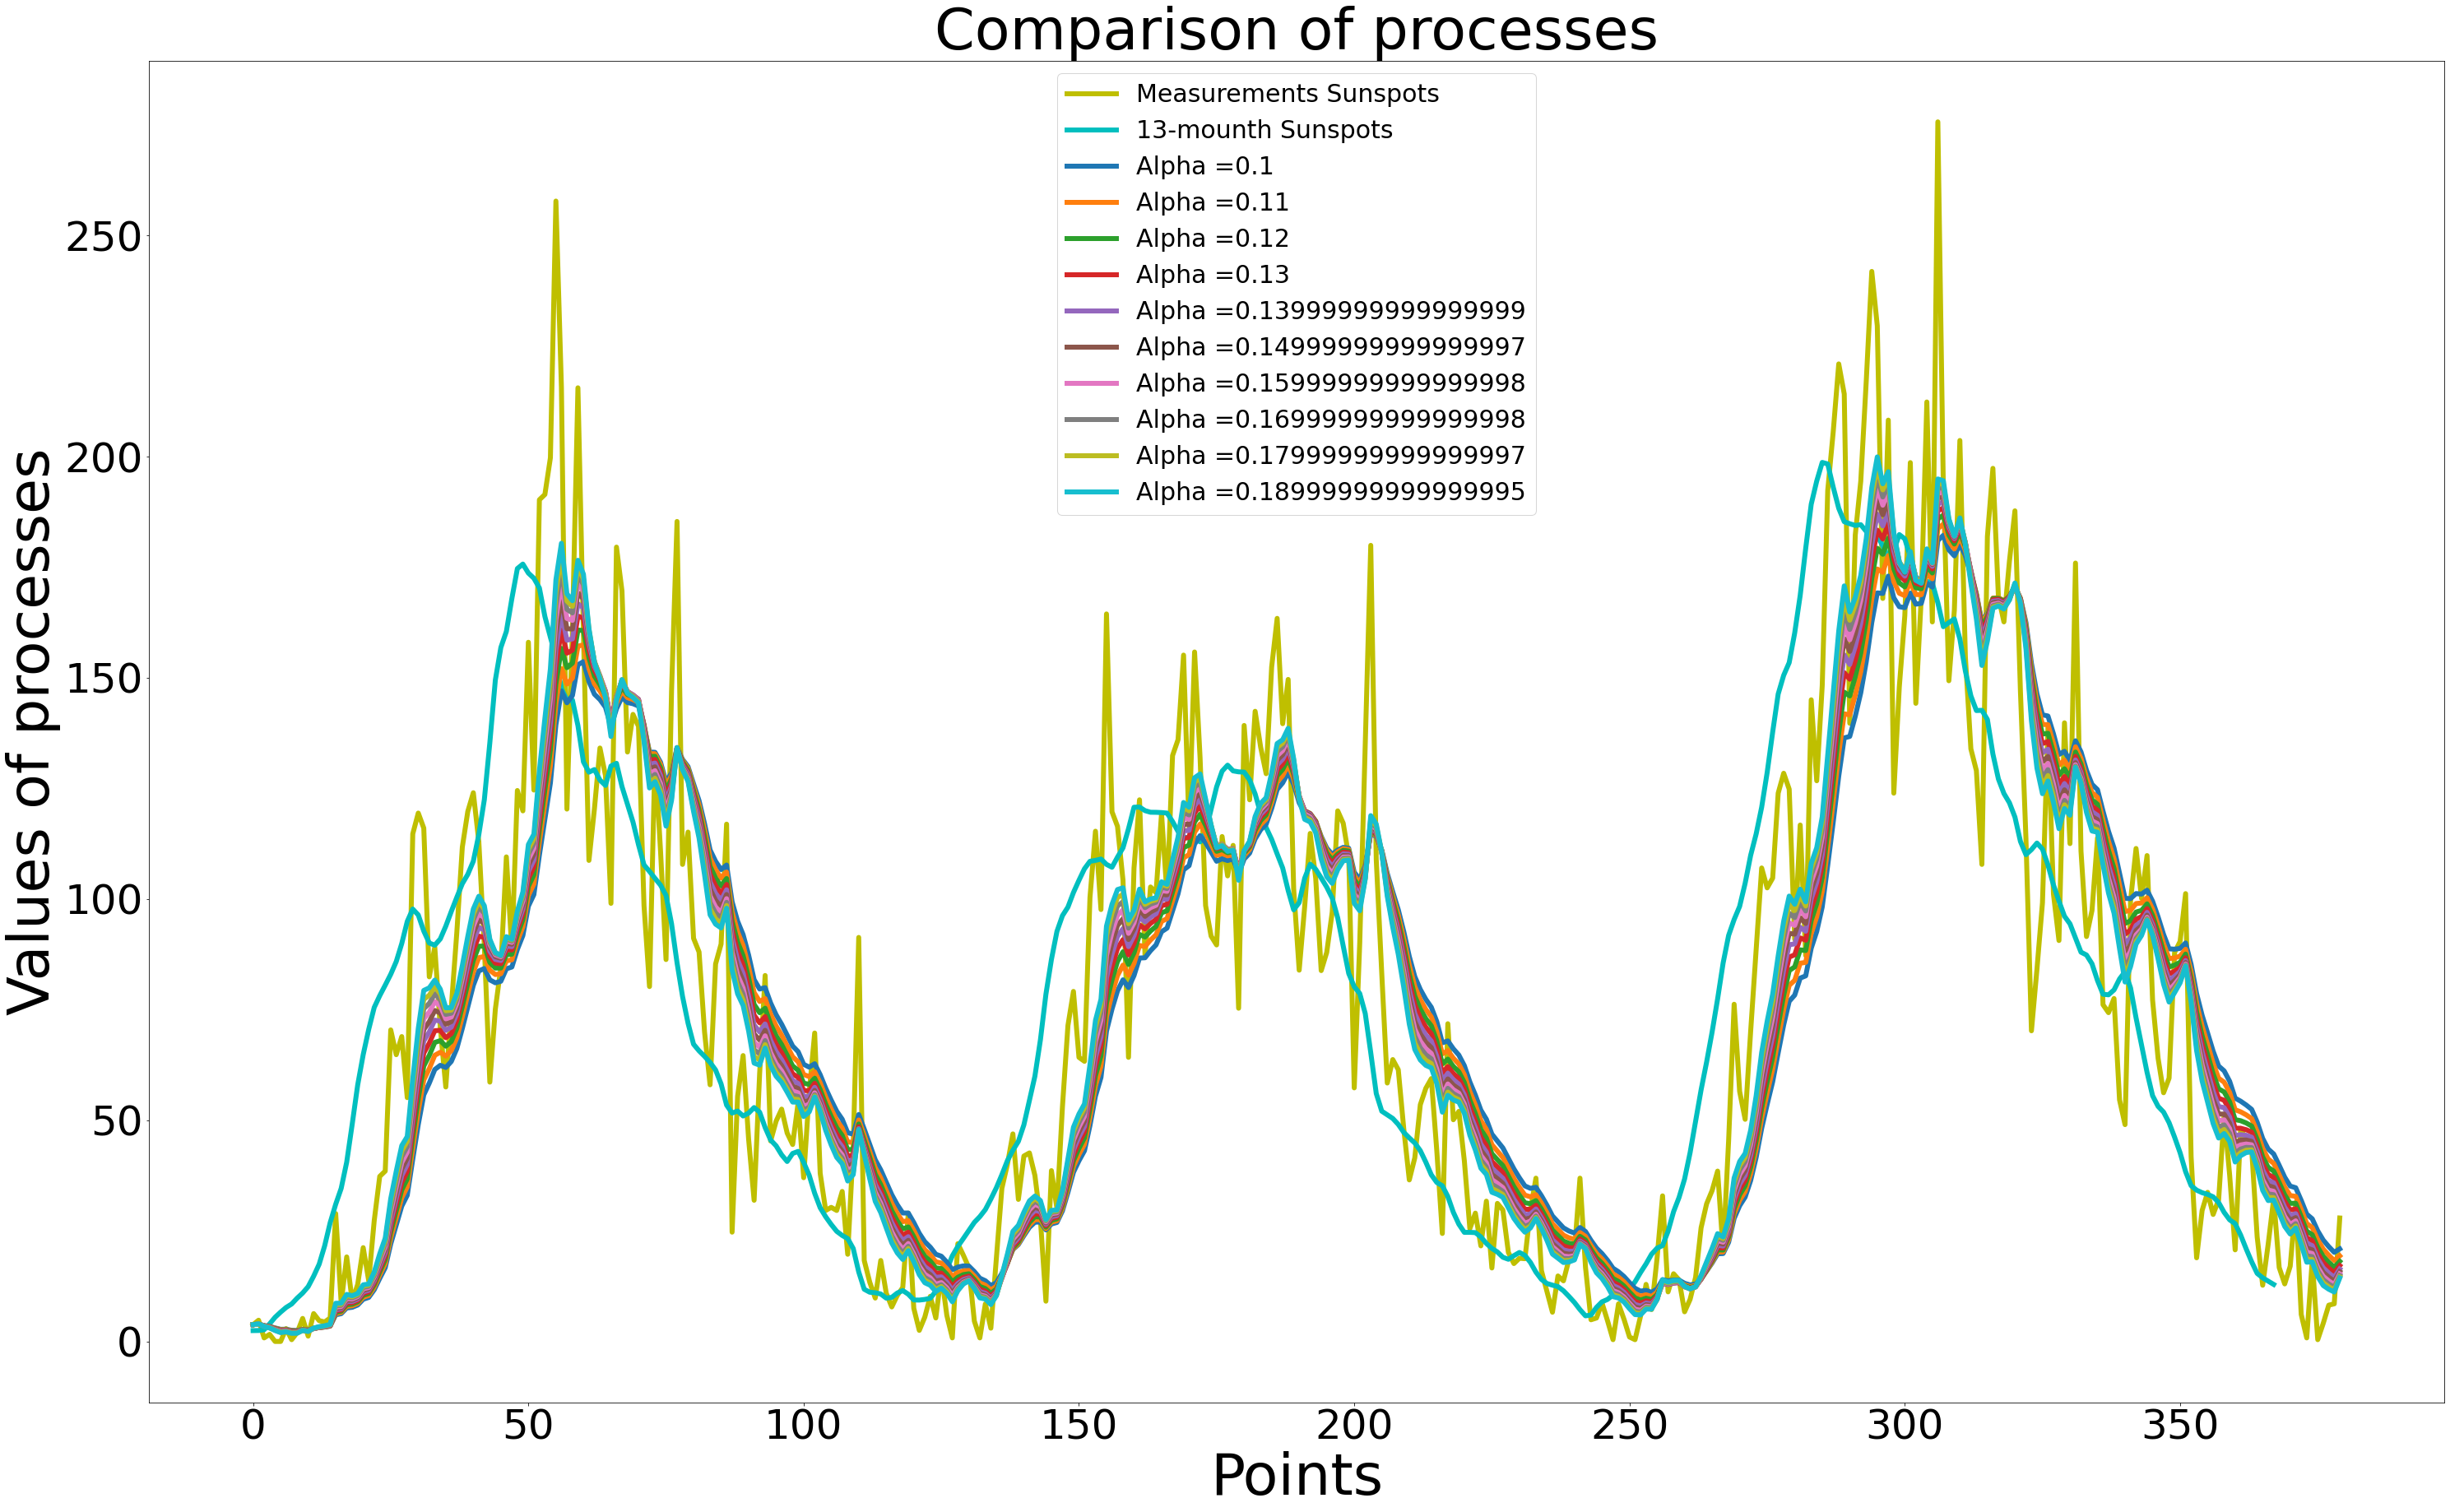

In [8]:
fig, ax = plt.subplots(figsize=(50, 30))
ax.set_title("Comparison of processes", fontsize = 70)
ax.set_ylabel("Values of processes", fontsize = 70)
ax.set_xlabel("Points", fontsize = 70)
ax.plot(sunspots, linewidth = 6, label = "Measurements Sunspots", color = "y")
ax.plot(r_sunspots, linewidth = 6, label = "13-mounth Sunspots", color = "c")
#ax.plot(running_mean(2, z3), linewidth = 6, label = 'Running Mean', color = 'r')
for i in range(len(alfa)):
    ax.plot(exp_mean(alfa[i], sunspots), linewidth = 6, label = 'Alpha ='+ str(alfa[i]))
    
ax.tick_params(labelsize = 50)
ax.legend(fontsize = 30)

Alpha best result for Forward Exponential Mean = 0.12

In [9]:
measurements_smoothed_b = np.zeros((len(sunspots), 1))
measurements_smoothed_b[len(sunspots)-1] = exp_mean(0.12,sunspots)[len(sunspots)-1]
for i in range(1, len(sunspots)):
     measurements_smoothed_b[len(sunspots)-i-1] = measurements_smoothed_b[len(sunspots)-i] + 0.12*(exp_mean(0.12,sunspots)[len(sunspots)-1-i] - measurements_smoothed_b[len(sunspots)-i])

In [10]:
Id_exp = sum((sunspots[:] - measurements_smoothed_b[0, :])**2)
Id_r = sum((sunspots[:] - r_sunspots[0, :])**2)

Iv_r = 0
for i in range(0, len(r_sunspots) -2):
    Iv_r += (r_sunspots[i+2,0] - 2*r_sunspots[i+1, 0] + r_sunspots[i, 0])**2
    
Iv_exp = 0
for i in range(0, len(r_sunspots) -2):
    Iv_exp += (measurements_smoothed_b[i+2,0] - 2*measurements_smoothed_b[i+1, 0] + measurements_smoothed_b[i, 0])**2


Running mean deviation = 3461816.504097223
Exponentional smoothing deviation = 3267437.4501358005
Running mean variability indicator = 1484.8649305555564
Exponentional smoothing variability indicator = 58.744135787460436


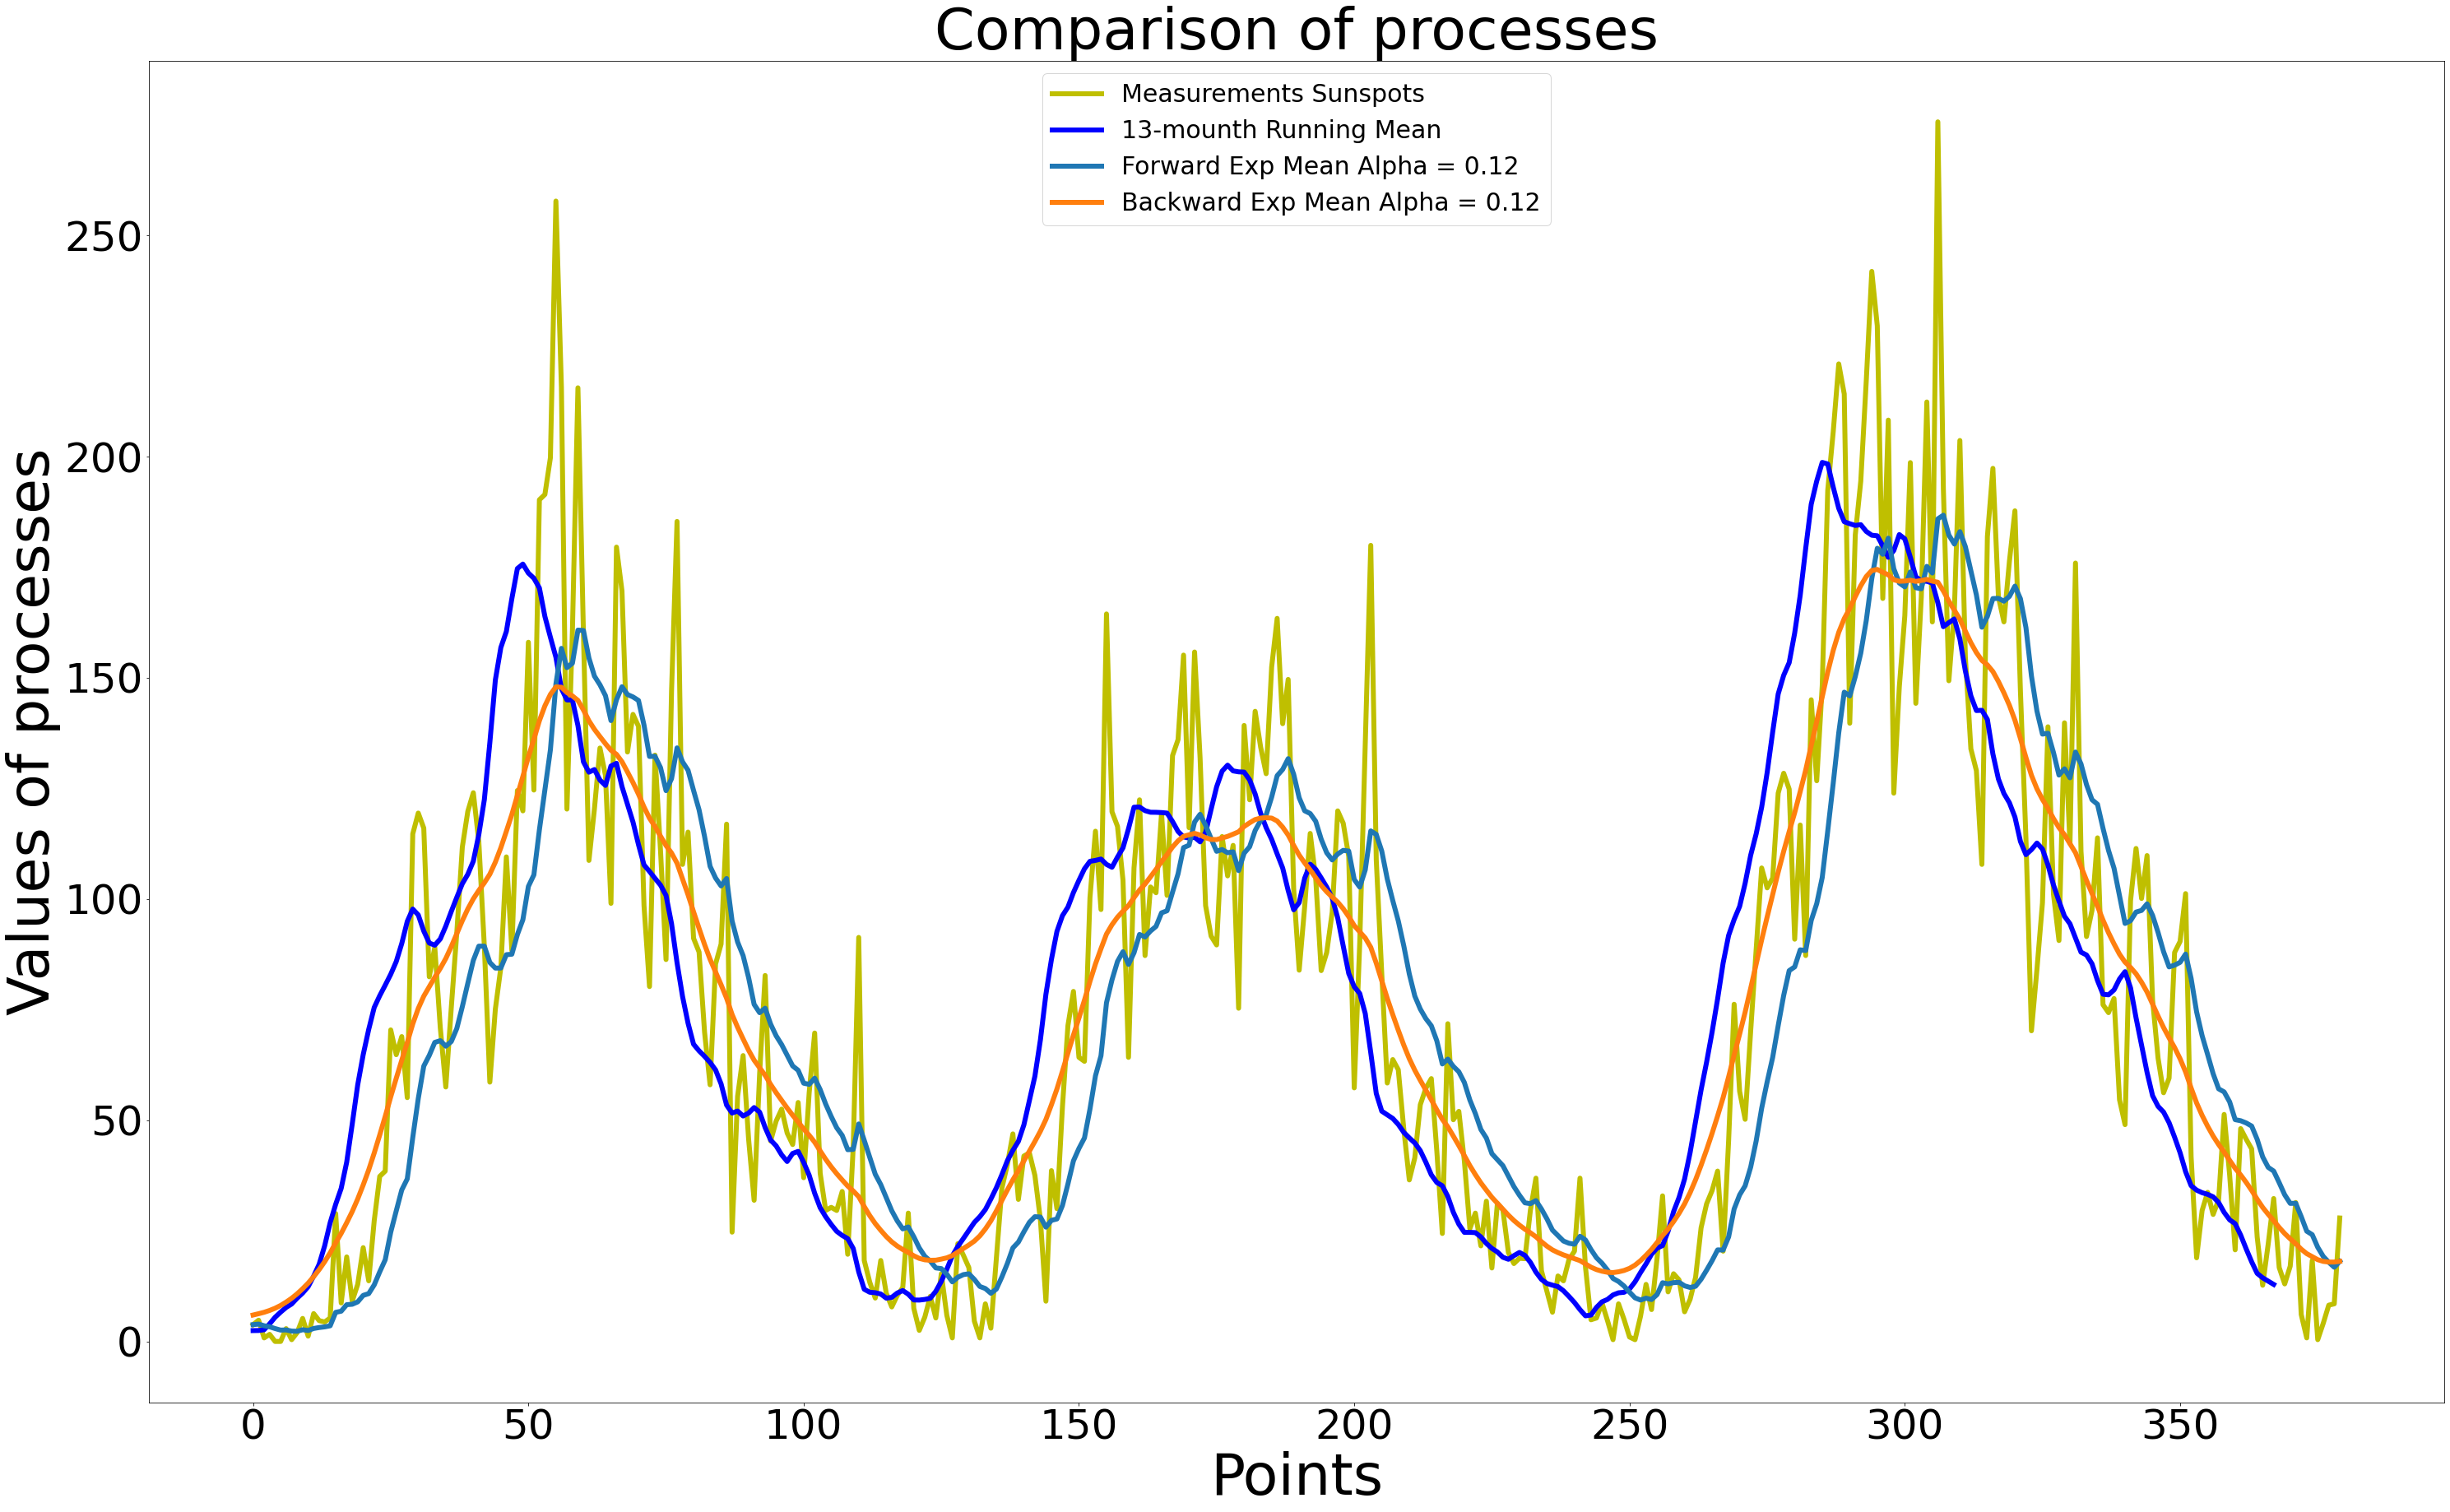

In [11]:
print('Running mean deviation =', Id_r)
print('Exponentional smoothing deviation =', Id_exp)
print('Running mean variability indicator =', Iv_r)
print('Exponentional smoothing variability indicator =', Iv_exp)

fig, ax = plt.subplots(figsize=(50,30))
ax.set_title("Comparison of processes", fontsize = 70)
ax.set_ylabel("Values of processes", fontsize = 70)
ax.set_xlabel("Points", fontsize = 70)
ax.plot(sunspots, linewidth=6,  label = "Measurements Sunspots", c = 'y')
ax.plot(r_sunspots, linewidth = 6, label = "13-mounth Running Mean", c = 'b')
ax.plot(exp_mean(0.12, sunspots), linewidth = 6, label = 'Forward Exp Mean Alpha = 0.12')
ax.plot(measurements_smoothed_b, linewidth = 6, label = "Backward Exp Mean Alpha = 0.12")

ax.tick_params(labelsize = 50)
ax.legend(fontsize = 30)

## PART II

In [12]:
#Part 2
#3d surface filtration using forward-backward smoothing
data_true = np.loadtxt('true_surface.txt')
data_noisy = np.loadtxt('noisy_surface.txt')

x_coordinate, y_coordinate = np.meshgrid(np.arange(len(data_true[0,:])), np.arange(len(data_true[0,:])))


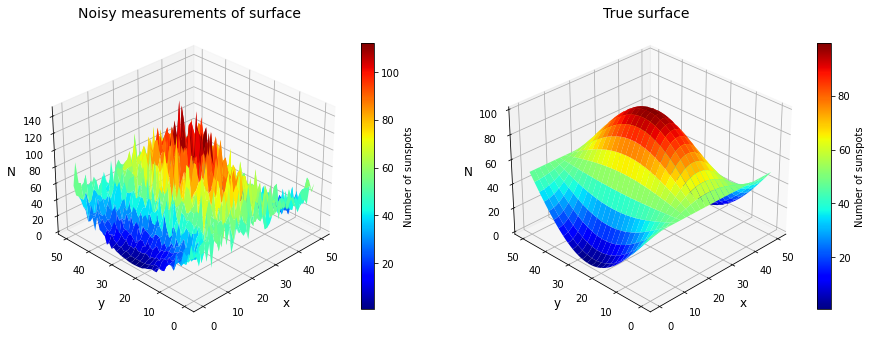

In [13]:
from cProfile import label

fig1 = plt.figure(figsize = (15, 7))

ax1 = fig1.add_subplot(1, 2, 2, projection = '3d')
ax1.set_title('True surface', fontsize = 14)
ax1.set_ylabel('y', fontsize = 12)
ax1.set_xlabel('x', fontsize = 12)
ax1.set_zlabel('N', fontsize = 12)

im1 = ax1.plot_surface(x_coordinate, y_coordinate, data_true, cmap=cm.jet)
ax1.view_init(30, -135)
plt.colorbar(im1, shrink = 0.7, label = 'Number of sunspots')

ax2 = fig1.add_subplot(1, 2, 1, projection='3d')
ax2.set_title('Noisy measurements of surface', fontsize = 14)
ax2.set_ylabel('y', fontsize = 12)
ax2.set_xlabel('x', fontsize = 12)
ax2.set_zlabel('N', fontsize = 12)

im2 = ax2.plot_surface(x_coordinate, y_coordinate, data_noisy, cmap=cm.jet)
ax2.view_init(30, -135)
plt.colorbar(im2, shrink = 0.7, label = 'Number of sunspots')
plt.show()


In [14]:
#The variance of deviation of noisy surface from the true one

Dev_n_t = np.zeros((len(data_noisy), len(data_noisy)))
Dev_n_t[:, :] = data_noisy[:, :] - data_true[:, :]
Dev_n_t = np.reshape(Dev_n_t, int(len(data_noisy)**2))
#надо делить на n или n-1?
Var_n_t = sum(Dev_n_t[:]**2)/(len(Dev_n_t))
print('Variance of deviation =', Var_n_t)

Variance of deviation = 122.01549845246063


In [15]:
#Forward-backward exponential smoothing alpha = 0.335
alpha = 0.335
Points = len(data_noisy)
fex_str = np.zeros((Points, Points))
bfex_str = np.zeros((Points, Points))
fex_col = np.zeros((Points, Points))
bfex_col = np.zeros((Points, Points))

#Strings smoothing
for n in range(0, Points):
    for m in range(0, Points):
        if m == 0:
            fex_str[n, m] = data_noisy[n, m]
        else:
            fex_str[n, m] = fex_str[n, m-1] + alpha*(data_noisy[n, m] - fex_str[n, m-1])
    
    bfex_str[n, Points-1] = fex_str[n, Points-1]
    for i in range(1, Points):
        bfex_str[n, Points-i-1] = bfex_str[n, Points-i] + alpha*(fex_str[n, Points-1-i] - bfex_str[n, Points-i])

#Columns smoothing
for n in range(0, Points):
    for i in range(0, Points):
        if i == 0:
            fex_col[Points-1, n] = bfex_str[Points-1, n]
        else:
            fex_col[Points-i-1, n] = fex_col[Points-i, n] + alpha*(bfex_str[Points-1-i, n] - fex_col[Points-i, n])

    bfex_col[0, n] = fex_col[0, n]

    for m in range(1, Points):
        bfex_col[m, n] = bfex_col[m-1, n] + alpha*(fex_col[m, n] - bfex_col[m-1, n])



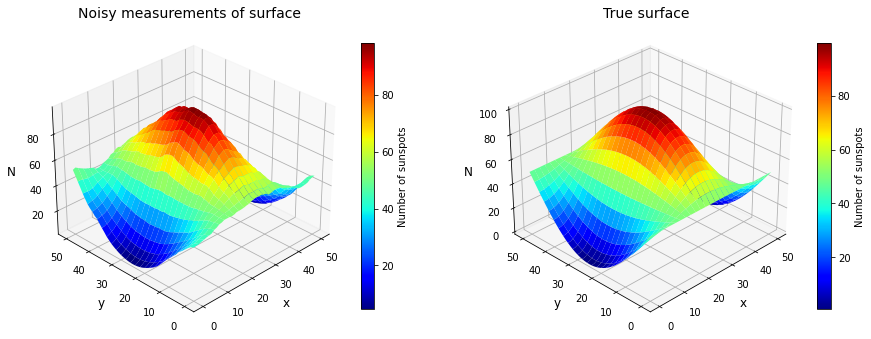

In [16]:
fig1 = plt.figure(figsize = (15, 7))

ax1 = fig1.add_subplot(1, 2, 2, projection = '3d')
ax1.set_title('True surface', fontsize = 14)
ax1.set_ylabel('y', fontsize = 12)
ax1.set_xlabel('x', fontsize = 12)
ax1.set_zlabel('N', fontsize = 12)

im1 = ax1.plot_surface(x_coordinate, y_coordinate, data_true, cmap=cm.jet)
ax1.view_init(30, -135)
plt.colorbar(im1, shrink = 0.7, label = 'Number of sunspots')

ax2 = fig1.add_subplot(1, 2, 1, projection='3d')
ax2.set_title('Noisy measurements of surface', fontsize = 14)
ax2.set_ylabel('y', fontsize = 12)
ax2.set_xlabel('x', fontsize = 12)
ax2.set_zlabel('N', fontsize = 12)

im2 = ax2.plot_surface(x_coordinate, y_coordinate, bfex_col, cmap=cm.jet)
ax2.view_init(30, -135)
plt.colorbar(im2, shrink = 0.7, label = 'Number of sunspots')
plt.show()

In [17]:
#The variance of deviation of smoothed surface from the true one

Dev_s_t = np.zeros((len(bfex_col), len(bfex_col)))
Dev_s_t[:, :] = bfex_col[:, :] - data_true[:, :]
Dev_s_t = np.reshape(Dev_s_t, int(len(bfex_col)**2))
Var_s_t = sum(Dev_s_t[:]**2)/(len(Dev_s_t))
print('Variance of deviation of smoothed surface from the true one =', Var_s_t)

Variance of deviation of smoothed surface from the true one = 6.69152437567703


In [18]:
alpha = np.arange(0, 0.61, 0.05)
Points = len(data_noisy)

fex_str = np.zeros((Points, Points, len(alpha)))
bfex_str = np.zeros((Points, Points, len(alpha)))
fex_col = np.zeros((Points, Points, len(alpha)))
bfex_col = np.zeros((Points, Points, len(alpha)))

#Strings smoothing
for f in range(len(alpha)):
    for n in range(0, Points):
        for m in range(0, Points):
            if m == 0:
                fex_str[n, m, f] = data_noisy[n, m]
            else:
                fex_str[n, m, f] = fex_str[n, m-1, f] + alpha[f]*(data_noisy[n, m] - fex_str[n, m-1, f])
    
        bfex_str[n, Points-1, f] = fex_str[n, Points-1, f]
        for i in range(1, Points):
            bfex_str[n, Points-i-1, f] = bfex_str[n, Points-i, f] + alpha[f]*(fex_str[n, Points-1-i, f] - bfex_str[n, Points-i, f])

#Columns smoothing
for f in range(len(alpha)):
    for n in range(0, Points):
        for i in range(0, Points):
            if i == 0:
                fex_col[Points-1, n, f] = bfex_str[Points-1, n, f]
            else:
                fex_col[Points-i-1, n, f] = fex_col[Points-i, n, f] + alpha[f]*(bfex_str[Points-1-i, n, f] - fex_col[Points-i, n, f])

        bfex_col[0, n, f] = fex_col[0, n, f]

        for m in range(1, Points):
            bfex_col[m, n, f] = bfex_col[m-1, n, f] + alpha[f]*(fex_col[m, n, f] - bfex_col[m-1, n, f])

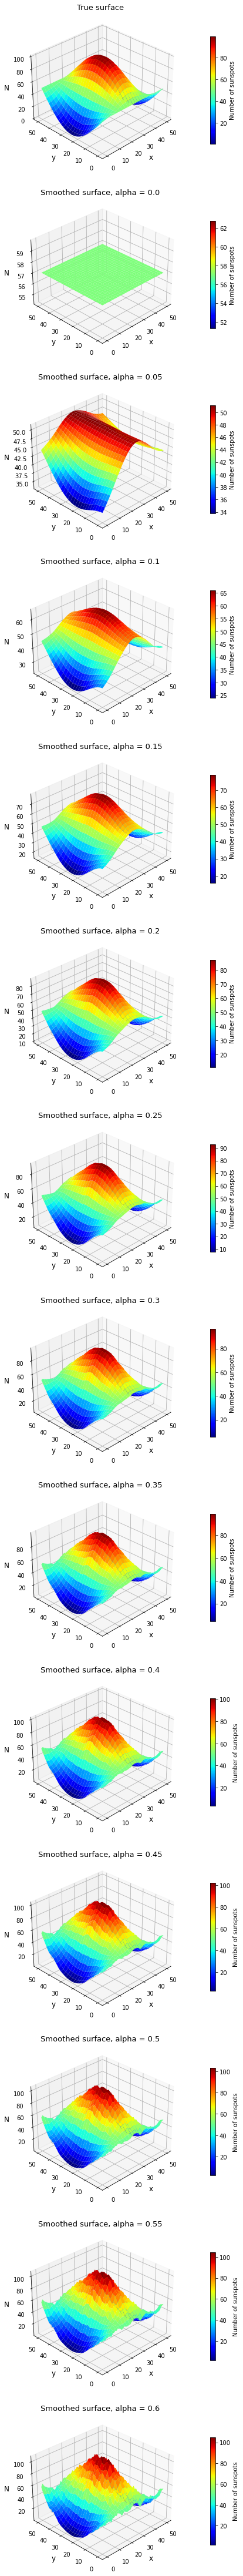

In [19]:
fig1 = plt.figure(figsize = (20, 80))
ax1 = fig1.add_subplot(len(alpha)+1, 1, 1, projection = '3d')
ax1.set_title('True surface', fontsize = 13)
ax1.set_ylabel('y', fontsize = 12)
ax1.set_xlabel('x', fontsize = 12)
ax1.set_zlabel('N', fontsize = 12)

im1 = ax1.plot_surface(x_coordinate, y_coordinate, data_true, cmap=cm.jet)
ax1.view_init(30, -135)
plt.colorbar(im1, shrink = 0.7, label = 'Number of sunspots')

for i in range(len(alpha)):
    ax1 = plt.subplot(len(alpha)+1, 1, i+2, projection = '3d')
    ax1.set_title('Smoothed surface, alpha = ' + str(round(alpha[i], 2)), fontsize = 13)
    ax1.set_ylabel('y', fontsize = 12)
    ax1.set_xlabel('x', fontsize = 12)
    ax1.set_zlabel('N', fontsize = 12)
    im1 = ax1.plot_surface(x_coordinate, y_coordinate, bfex_col[:, :, i], cmap=cm.jet)
    ax1.view_init(30, -135)
    plt.colorbar(im1, shrink = 0.7, label = 'Number of sunspots')

plt.show()

In [20]:
#The variance of deviation of smoothed surface from the true one for different alpha
def deviation(alpha_in):
    a = np.zeros((len(bfex_col), len(bfex_col), len(alpha)))
    a = bfex_col[:, :, alpha_in] - data_true[:, :]
    a = np.reshape(a, int(len(bfex_col)**2))
    Var = sum(a[:]**2)/(len(a))
    return Var

Var_alpha = np.zeros(len(alpha))
for i in range(len(alpha)):
    Var_alpha[i] = deviation(i)
alpha_min = alpha[np.where(Var_alpha[:] == np.min(Var_alpha))]

In [21]:
alpha_precised = np.arange(alpha_min-0.05, alpha_min+0.06, 0.01)
Points = len(data_noisy)

fex_str_p = np.zeros((Points, Points, len(alpha_precised)))
bfex_str_p = np.zeros((Points, Points, len(alpha_precised)))
fex_col_p = np.zeros((Points, Points, len(alpha_precised)))
bfex_col_p = np.zeros((Points, Points, len(alpha_precised)))

#Strings smoothing
for f in range(len(alpha_precised)):
    for n in range(0, Points):
        for m in range(0, Points):
            if m == 0:
                fex_str_p[n, m, f] = data_noisy[n, m]
            else:
                fex_str_p[n, m, f] = fex_str_p[n, m-1, f] + alpha_precised[f]*(data_noisy[n, m] - fex_str_p[n, m-1, f])
    
        bfex_str_p[n, Points-1, f] = fex_str_p[n, Points-1, f]
        for i in range(1, Points):
            bfex_str_p[n, Points-i-1, f] = bfex_str_p[n, Points-i, f] + alpha_precised[f]*(fex_str_p[n, Points-1-i, f] - bfex_str_p[n, Points-i, f])

#Columns smoothing
for f in range(len(alpha_precised)):
    for n in range(0, Points):
        for i in range(0, Points):
            if i == 0:
                fex_col_p[Points-1, n, f] = bfex_str_p[Points-1, n, f]
            else:
                fex_col_p[Points-i-1, n, f] = fex_col_p[Points-i, n, f] + alpha_precised[f]*(bfex_str_p[Points-1-i, n, f] - fex_col_p[Points-i, n, f])

        bfex_col_p[0, n, f] = fex_col_p[0, n, f]

        for m in range(1, Points):
            bfex_col_p[m, n, f] = bfex_col_p[m-1, n, f] + alpha_precised[f]*(fex_col_p[m, n, f] - bfex_col_p[m-1, n, f])

In [22]:
def deviation_p(alpha_in):
    a = np.zeros((len(bfex_col_p), len(bfex_col_p), len(alpha_precised)))
    a = bfex_col_p[:, :, alpha_in] - data_true[:, :]
    a = np.reshape(a, int(len(bfex_col_p)**2))
    Var = sum(a[:]**2)/(len(a))
    return Var

Var_alpha_final = np.zeros(len(alpha_precised))
for i in range(len(alpha_precised)):
    Var_alpha_final[i] = deviation_p(i)
alpha_final = alpha_precised[np.where(Var_alpha_final[:] == np.min(Var_alpha_final))]
print('Variance =', Var_alpha_final[np.where(Var_alpha_final[:] == np.min(Var_alpha_final))][0], '\nThe most precise alpha =', round(alpha_final[0],2))

Variance = 4.301900836887329 
The most precise alpha = 0.43


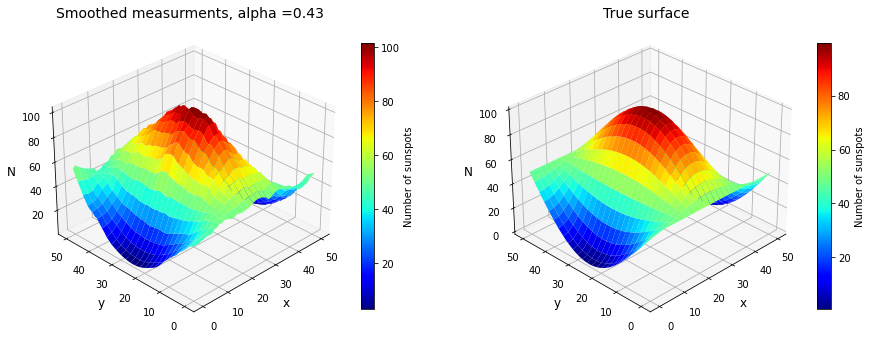

In [23]:
fig1 = plt.figure(figsize = (15, 7))

ax1 = fig1.add_subplot(1, 2, 2, projection = '3d')
ax1.set_title('True surface', fontsize = 14)
ax1.set_ylabel('y', fontsize = 12)
ax1.set_xlabel('x', fontsize = 12)
ax1.set_zlabel('N', fontsize = 12)

im1 = ax1.plot_surface(x_coordinate, y_coordinate, data_true, cmap=cm.jet)
ax1.view_init(30, -135)
plt.colorbar(im1, shrink = 0.7, label = 'Number of sunspots')

ax2 = fig1.add_subplot(1, 2, 1, projection='3d')
ax2.set_title('Smoothed measurments, alpha =' + str(round(alpha_final[0], 2)), fontsize = 14)
ax2.set_ylabel('y', fontsize = 12)
ax2.set_xlabel('x', fontsize = 12)
ax2.set_zlabel('N', fontsize = 12)

im2 = ax2.plot_surface(x_coordinate, y_coordinate, bfex_col_p[:, :, np.where(Var_alpha_final[:] == np.min(Var_alpha_final))[0][0]], cmap=cm.jet)
ax2.view_init(30, -135)
plt.colorbar(im2, shrink = 0.7, label = 'Number of sunspots')
plt.show()